<h2>Question Tree: Use Decision Trees Classifier to model the data set classifying and evaluation of classes of iris</h2>

<b>By: Simon Peter Wamahe</b>

<b>SEP21/COMP/703U</b>

In [3]:
#Import main libraries to be used
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Downloading the dataset

In [4]:
!wget -O iris.csv https://raw.githubusercontent.com/mkumakech/students/main/iris.csv

--2021-12-09 18:34:49--  https://raw.githubusercontent.com/mkumakech/students/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2597 (2.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.54K  --.-KB/s    in 0s      

2021-12-09 18:34:49 (28.5 MB/s) - ‘iris.csv’ saved [2597/2597]



In [5]:
df = pd.read_csv('iris.csv')
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,class
95,7.2,3.0,5.8,1.6,virginica
96,7.4,2.8,6.1,1.9,virginica
97,7.9,3.8,6.4,2.0,virginica
98,6.4,2.8,5.6,2.2,virginica
99,6.3,2.8,5.1,1.5,virginica


<b>a) </b>Generating the decision trees figure

In [7]:
X = df[["sepalLength", "sepalWidth", "petalLength", "petalWidth"]].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
y = df["class"].values
y[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

Setting up the decision tree

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.3, random_state=3)

Create entropy

In [11]:
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
irisTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fitting the data

In [12]:
irisTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predicting

In [13]:
predictTree = irisTree.predict(X_trainset)

In [14]:
print (predictTree [0:5])
print (y_testset [0:5])

['setosa' 'setosa' 'setosa' 'setosa' 'virginica']
['virginica' 'virginica' 'setosa' 'versicolor' 'virginica']


Visualising the tree

In [17]:
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
import pydotplus
import graphviz
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

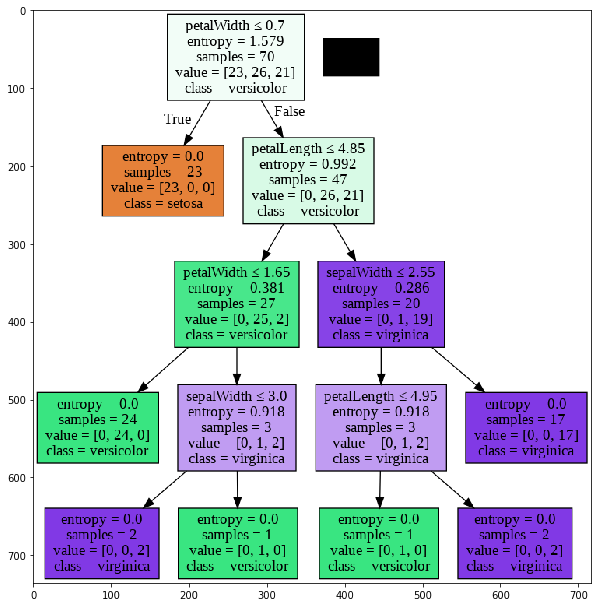

In [21]:
dot_data = StringIO()
filename = "irisTree.png"
featureNames = df.columns[0:4]
targetNames = df["class"].unique().tolist()
out = tree.export_graphviz(irisTree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')

<b>b)	</b>Evaluate the decision Trees classifier using Jaccard index, F1-scores, and log loss metrics

In [24]:
!pip install scipy


In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

ImportError: ignored